## Interpretable Student Placement Prediction

In [166]:
# 1. DATA PREPROCESSING
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

## Loading data

In [167]:
df = pd.read_csv("C:/Users/chipu/Documents/Project/placement_dataset##.csv")

In [168]:
X = df.columns
X

Index(['cgpa', 'iq', 'placement_status', 'degree_program', 'math_score',
       'english_score', 'attendance_rate', 'backlogs_count',
       'certification_count', 'internship_count', 'project_count',
       'hours_studied_per_week', 'technical_skills_score', 'soft_skills_score',
       'number_of_job_applications', 'household_income_bracket',
       'urban_or_rural_background', 'previous_employment',
       'extracurricular_activities_description', 'career_objective_text'],
      dtype='object')

## Data Inspection


In [169]:
# Initial inspection
print("Initial Shape:", df.shape)
print(df.head())

Initial Shape: (100, 20)
   cgpa   iq  placement_status degree_program  math_score  english_score  \
0   6.8   90                 1    Electronics          60             60   
1   6.5   90                 1     Mechanical          70             60   
2   7.0   64                 1    Electronics          60             60   
3   7.5  158                 1             IT          90            100   
4   6.8  141                 1     Mechanical          60             60   

  attendance_rate  backlogs_count  certification_count  internship_count  \
0       Below 50%               4                    1                 0   
1       Below 50%               2                    0                 1   
2      51% to 74%               3                    0                 0   
3     75% to 100%               0                    1                 1   
4      51% to 74%               2                    0                 0   

   project_count  hours_studied_per_week  technical_skills_sc

In [170]:
X = df.drop('placement_status', axis=1)

## Handling missing values

In [171]:
print("MISSING VALUES COUNT:")
print(df.isnull().sum())

MISSING VALUES COUNT:
cgpa                                       0
iq                                         0
placement_status                           0
degree_program                             0
math_score                                 0
english_score                              0
attendance_rate                            0
backlogs_count                             0
certification_count                        0
internship_count                           0
project_count                              0
hours_studied_per_week                     0
technical_skills_score                     0
soft_skills_score                          0
number_of_job_applications                 0
household_income_bracket                   0
urban_or_rural_background                  0
previous_employment                        0
extracurricular_activities_description    82
career_objective_text                      0
dtype: int64


In [172]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns


In [173]:
import random

# Using Mean Imputation for numerical columns 
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        mean_val = df[col].mean()
        df[col].fillna(mean_val, inplace=True)

# Handle Categorical Columns: Random Sampling from Existing Values ---
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        existing_values = df[col].dropna().tolist()
        df[col] = df[col].apply(
            lambda x: random.choice(existing_values) if pd.isnull(x) else x
        )

In [174]:
# Check if any missing values remain
print("Missing values after imputation:\n", df.isnull().sum())

Missing values after imputation:
 cgpa                                      0
iq                                        0
placement_status                          0
degree_program                            0
math_score                                0
english_score                             0
attendance_rate                           0
backlogs_count                            0
certification_count                       0
internship_count                          0
project_count                             0
hours_studied_per_week                    0
technical_skills_score                    0
soft_skills_score                         0
number_of_job_applications                0
household_income_bracket                  0
urban_or_rural_background                 0
previous_employment                       0
extracurricular_activities_description    0
career_objective_text                     0
dtype: int64


### Feature Engineering

In [175]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = [
    'degree_program',
    'attendance_rate',
    'household_income_bracket',
    'urban_or_rural_background',
    'previous_employment',
    'extracurricular_activities_description',
    'career_objective_text'
]



# Initializing a dictionary to store encoders
label_encoders = {}

# Encoding only actual categorical columns
for col in categorical_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le
    else:
        print(f"Warning: Column '{col}' not found in the dataset!")



In [176]:
print("Encoded categorical columns:", list(label_encoders.keys()))

Encoded categorical columns: ['degree_program', 'attendance_rate', 'household_income_bracket', 'urban_or_rural_background', 'previous_employment', 'extracurricular_activities_description', 'career_objective_text']


In [177]:
for col in label_encoders:
    print(f"\nColumn: {col}")
    print(df[[col]].head())  # Show first few encoded values


Column: degree_program
   degree_program
0               1
1               3
2               1
3               2
4               3

Column: attendance_rate
   attendance_rate
0                2
1                2
2                0
3                1
4                0

Column: household_income_bracket
   household_income_bracket
0                         2
1                         2
2                         1
3                         0
4                         2

Column: urban_or_rural_background
   urban_or_rural_background
0                          0
1                          0
2                          0
3                          1
4                          0

Column: previous_employment
   previous_employment
0                    0
1                    0
2                    0
3                    1
4                    0

Column: extracurricular_activities_description
   extracurricular_activities_description
0                                       1
1                  

In [178]:
## Saving the encoded categories
import pickle

with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)


In [179]:
# Separate features and target
X = df.drop("placement_status", axis=1)  # assume 'Placement' is the target
y = df["placement_status"]

In [180]:
# Drop the free-text fields before scaling
X_numeric = X.drop(columns=[
    "extracurricular_activities_description",
    "career_objective_text"
], errors="ignore")  # errors="ignore" avoids crash if column is already gone

# Apply StandardScaler only to numeric data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)


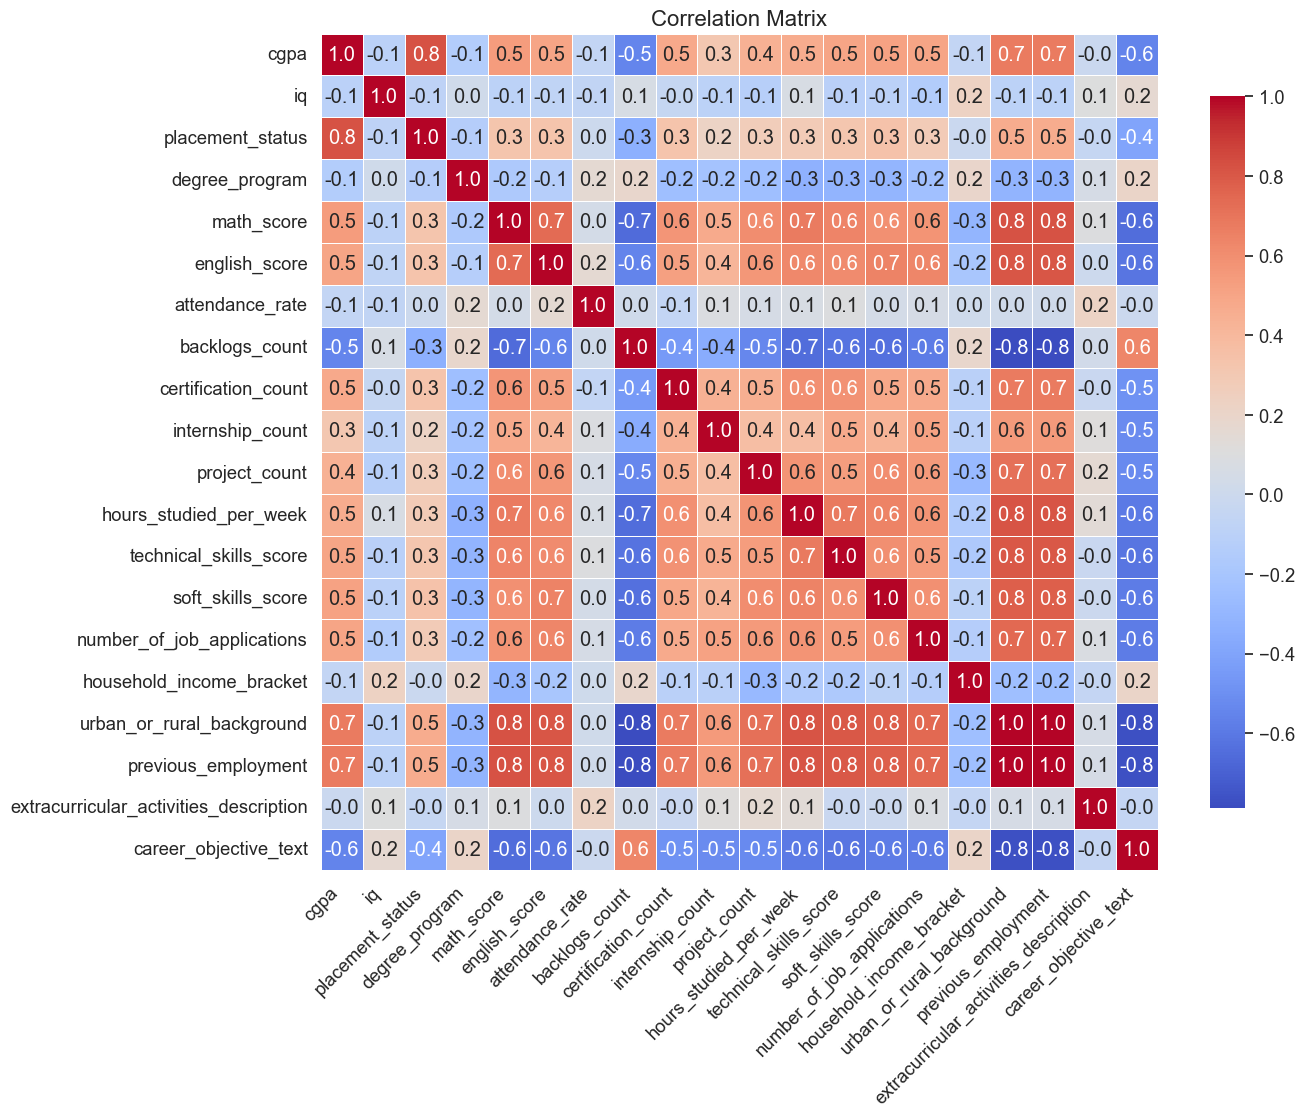

In [181]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(14, 12))  
sns.set(font_scale=1.2)       
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".1f",                # Show only 2 decimal places
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75}
)


plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()

In [182]:
# Upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [183]:
# Threshold for high correlation
threshold = 0.75

# List highly correlated feature pairs
high_corr_pairs = [(col, row, upper.loc[row, col])
                   for col in upper.columns
                   for row in upper.index
                   if abs(upper.loc[row, col]) >= threshold]

# Sort by highest correlation
high_corr_pairs = sorted(high_corr_pairs, key=lambda x: -x[2])

# Print results
for col1, col2, corr_value in high_corr_pairs:
    print(f"{col1} & {col2} => correlation = {corr_value:.2f}")


previous_employment & urban_or_rural_background => correlation = 1.00
urban_or_rural_background & math_score => correlation = 0.82
previous_employment & math_score => correlation = 0.82
placement_status & cgpa => correlation = 0.82
urban_or_rural_background & hours_studied_per_week => correlation = 0.82
previous_employment & hours_studied_per_week => correlation = 0.82
urban_or_rural_background & english_score => correlation = 0.81
previous_employment & english_score => correlation = 0.81
urban_or_rural_background & technical_skills_score => correlation = 0.80
previous_employment & technical_skills_score => correlation = 0.80
urban_or_rural_background & soft_skills_score => correlation = 0.78
previous_employment & soft_skills_score => correlation = 0.78
career_objective_text & urban_or_rural_background => correlation = -0.77
career_objective_text & previous_employment => correlation = -0.77
urban_or_rural_background & backlogs_count => correlation = -0.79
previous_employment & backlogs

In [184]:
# List of features to drop
drop_features = [
    'hours_studied_per_week',
    'career_objective_text',
    'backlogs_count',
    'project_count',
]

# Drop the columns
df_cleaned = df.drop(columns=drop_features)

# Optional: check remaining columns
print("Remaining columns:", df_cleaned.columns.tolist())


Remaining columns: ['cgpa', 'iq', 'placement_status', 'degree_program', 'math_score', 'english_score', 'attendance_rate', 'certification_count', 'internship_count', 'technical_skills_score', 'soft_skills_score', 'number_of_job_applications', 'household_income_bracket', 'urban_or_rural_background', 'previous_employment', 'extracurricular_activities_description']


In [185]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

## Model Building and Training

In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [187]:
# Initializing models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier()
}

In [188]:
# Training the models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully.")

Logistic Regression trained successfully.
Decision Tree trained successfully.
SVM trained successfully.
Random Forest trained successfully.
Naive Bayes trained successfully.
Gradient Boosting trained successfully.


## Evaluation Metrics

In [189]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for name, model in models.items():
    y_pred = model.predict(X_test)

In [190]:
print(f"\n{name} Results:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")


Gradient Boosting Results:
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1 Score:  1.0000


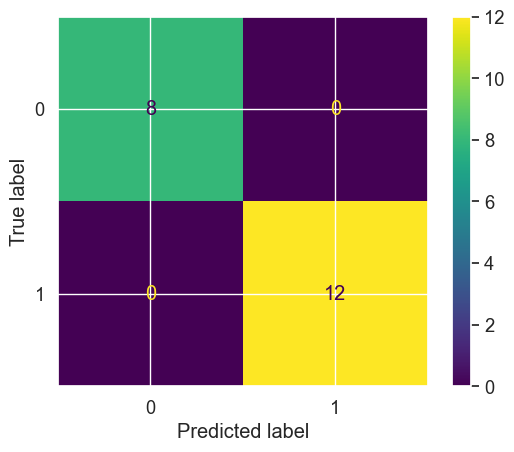

In [191]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)


In [192]:
from sklearn.metrics import roc_auc_score

y_proba = model.predict_proba(X_test)[:, 1]
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")


ROC AUC Score: 1.0000


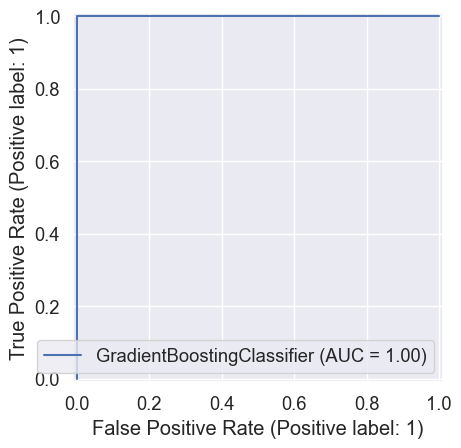

In [193]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model, X_test, y_test)


## Checking feature importance

In [194]:
print(type(X_train))

<class 'numpy.ndarray'>


In [195]:
feature_names = ['cgpa', 'iq', 'placement_status', 'degree_program', 'math_score',
       'english_score', 'attendance_rate', 'certification_count',
       'internship_count', 'technical_skills_score', 'soft_skills_score',
       'number_of_job_applications', 'household_income_bracket',
       'urban_or_rural_background', 'previous_employment',
       'extracurricular_activities_description', 'placement_status']


X_train_df = pd.DataFrame(X_train, columns=feature_names)

In [196]:
importances = model.feature_importances_
feature_names = X_train_df.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df.sort_values(by="Importance", ascending=False, inplace=True)
print(importance_df)

                                   Feature    Importance
0                                     cgpa  8.636779e-01
9                   technical_skills_score  5.106766e-02
6                          attendance_rate  3.019288e-02
1                                       iq  1.961391e-02
10                       soft_skills_score  9.738334e-03
5                            english_score  9.458083e-03
3                           degree_program  6.358113e-03
4                               math_score  4.757453e-03
7                      certification_count  1.501044e-03
12                household_income_bracket  1.376762e-03
8                         internship_count  1.364552e-03
11              number_of_job_applications  7.114357e-04
14                     previous_employment  1.237153e-04
13               urban_or_rural_background  5.429814e-05
16                        placement_status  1.961674e-06
15  extracurricular_activities_description  1.604785e-06
2                         place

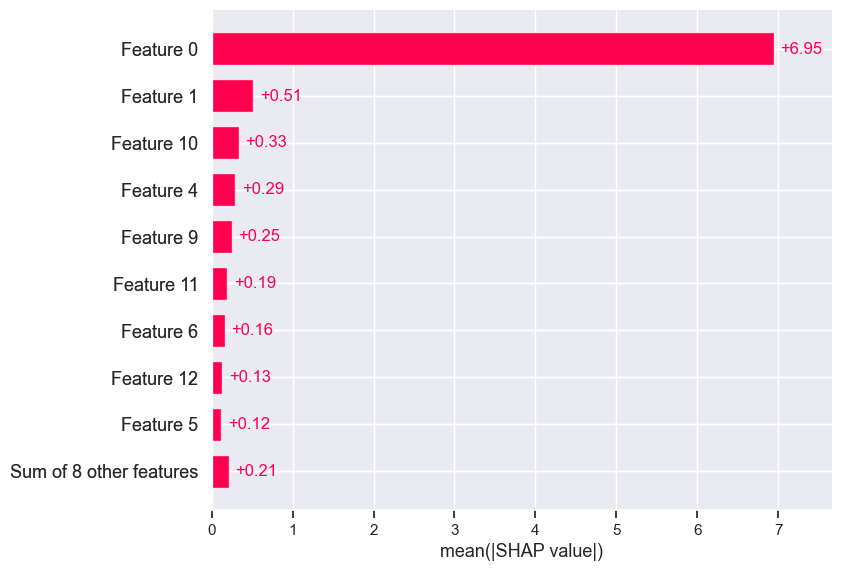

In [197]:
import shap

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)
shap.plots.bar(shap_values)

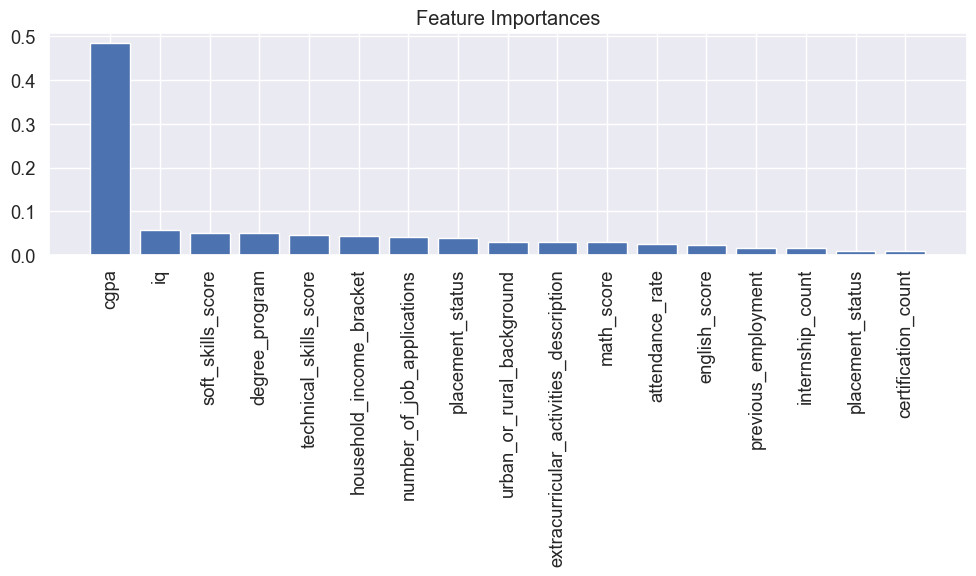

In [198]:
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [X_train_df.columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

In [199]:
print(f"Number of feature names: {len(feature_names)}")
print(f"Number of importances: {len(importances)}")


Number of feature names: 17
Number of importances: 17


In [200]:
print(feature_names)

Index(['cgpa', 'iq', 'placement_status', 'degree_program', 'math_score',
       'english_score', 'attendance_rate', 'certification_count',
       'internship_count', 'technical_skills_score', 'soft_skills_score',
       'number_of_job_applications', 'household_income_bracket',
       'urban_or_rural_background', 'previous_employment',
       'extracurricular_activities_description', 'placement_status'],
      dtype='object')


### Explainability usig SHAP

In [201]:
# import shap
import matplotlib.pyplot as plt

In [202]:
from sklearn.ensemble import RandomForestClassifier

best_model = RandomForestClassifier() 
best_model.fit(X_train, y_train)       



RandomForestClassifier()

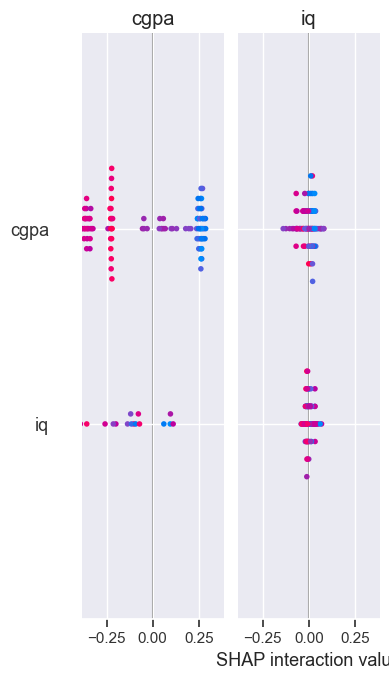

In [203]:
from sklearn.ensemble import RandomForestClassifier
import shap

# Train model
model = RandomForestClassifier()
model.fit(X, y)

# Use TreeExplainer for tree-based models
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Plot SHAP summary
shap.summary_plot(shap_values, X)


### SHAP Summary Plot (Feature Importance)


In [204]:
print(shap_values[1].shape)
print(X_test.shape)

(19, 2)
(20, 17)


In [205]:
# # import shap
# # import matplotlib.pyplot as plt

# # # Assuming you've already computed shap_values and have X_test_df
# # shap.summary_plot(shap_values[1], X_test)

# # # Optional: Save it
# # plt.savefig("shap_summary_plot.png")


# from sklearn.ensemble import RandomForestClassifier
# import shap
# import matplotlib.pyplot as plt

# # Train on train split
# model = RandomForestClassifier()
# model.fit(X_train, y_train)

# # Use TreeExplainer for RandomForest
# explainer = shap.TreeExplainer(model)
# shap_values = explainer.shap_values(X_test)

# # For binary classification, use shap_values[1] for class 1
# shap.summary_plot(shap_values[1], X_test)

# plt.savefig("shap_summary_plot.png")



### SHAP Force Plot (Single Prediction Explanation)

### Surrogate model for Interpretability

In [206]:

# Re-wrap X_train (NumPy array) as a DataFrame using the original column names
X_train_df = pd.DataFrame(X_train, columns=X.columns[:X_train.shape[1]])


print("Columns that will be used to train the surrogate model (X_train):")
print(list(X_train_df.columns))
print(f"Total: {len(X_train_df.columns)} columns")

print("\nOriginal columns from X:")
print(list(X.columns))
print(f"Total: {len(X.columns)} columns")


Columns that will be used to train the surrogate model (X_train):
['cgpa', 'iq', 'degree_program', 'math_score', 'english_score', 'attendance_rate', 'backlogs_count', 'certification_count', 'internship_count', 'project_count', 'hours_studied_per_week', 'technical_skills_score', 'soft_skills_score', 'number_of_job_applications', 'household_income_bracket', 'urban_or_rural_background', 'previous_employment']
Total: 17 columns

Original columns from X:
['cgpa', 'iq', 'degree_program', 'math_score', 'english_score', 'attendance_rate', 'backlogs_count', 'certification_count', 'internship_count', 'project_count', 'hours_studied_per_week', 'technical_skills_score', 'soft_skills_score', 'number_of_job_applications', 'household_income_bracket', 'urban_or_rural_background', 'previous_employment', 'extracurricular_activities_description', 'career_objective_text']
Total: 19 columns


In [207]:
# Dropping the free-text columns from X
filtered_columns = X.drop(columns=['extracurricular_activities_description', 'career_objective_text']).columns

X_train_df = pd.DataFrame(X_train, columns=filtered_columns)


In [208]:
from sklearn.tree import DecisionTreeClassifier, export_text

# Train surrogate model
surrogate = DecisionTreeClassifier(max_depth=3)
surrogate.fit(X_train, best_model.predict(X_train))

# Print decision rules
print("\nðŸ“œ Surrogate Decision Tree Rules:")
print(export_text(surrogate, feature_names=list(X_train_df.columns)))



ðŸ“œ Surrogate Decision Tree Rules:
|--- cgpa <= 0.14
|   |--- cgpa <= -0.39
|   |   |--- class: 0
|   |--- cgpa >  -0.39
|   |   |--- project_count <= -0.81
|   |   |   |--- class: 1
|   |   |--- project_count >  -0.81
|   |   |   |--- class: 0
|--- cgpa >  0.14
|   |--- class: 1



###  Surrogate Decision Tree Visualization

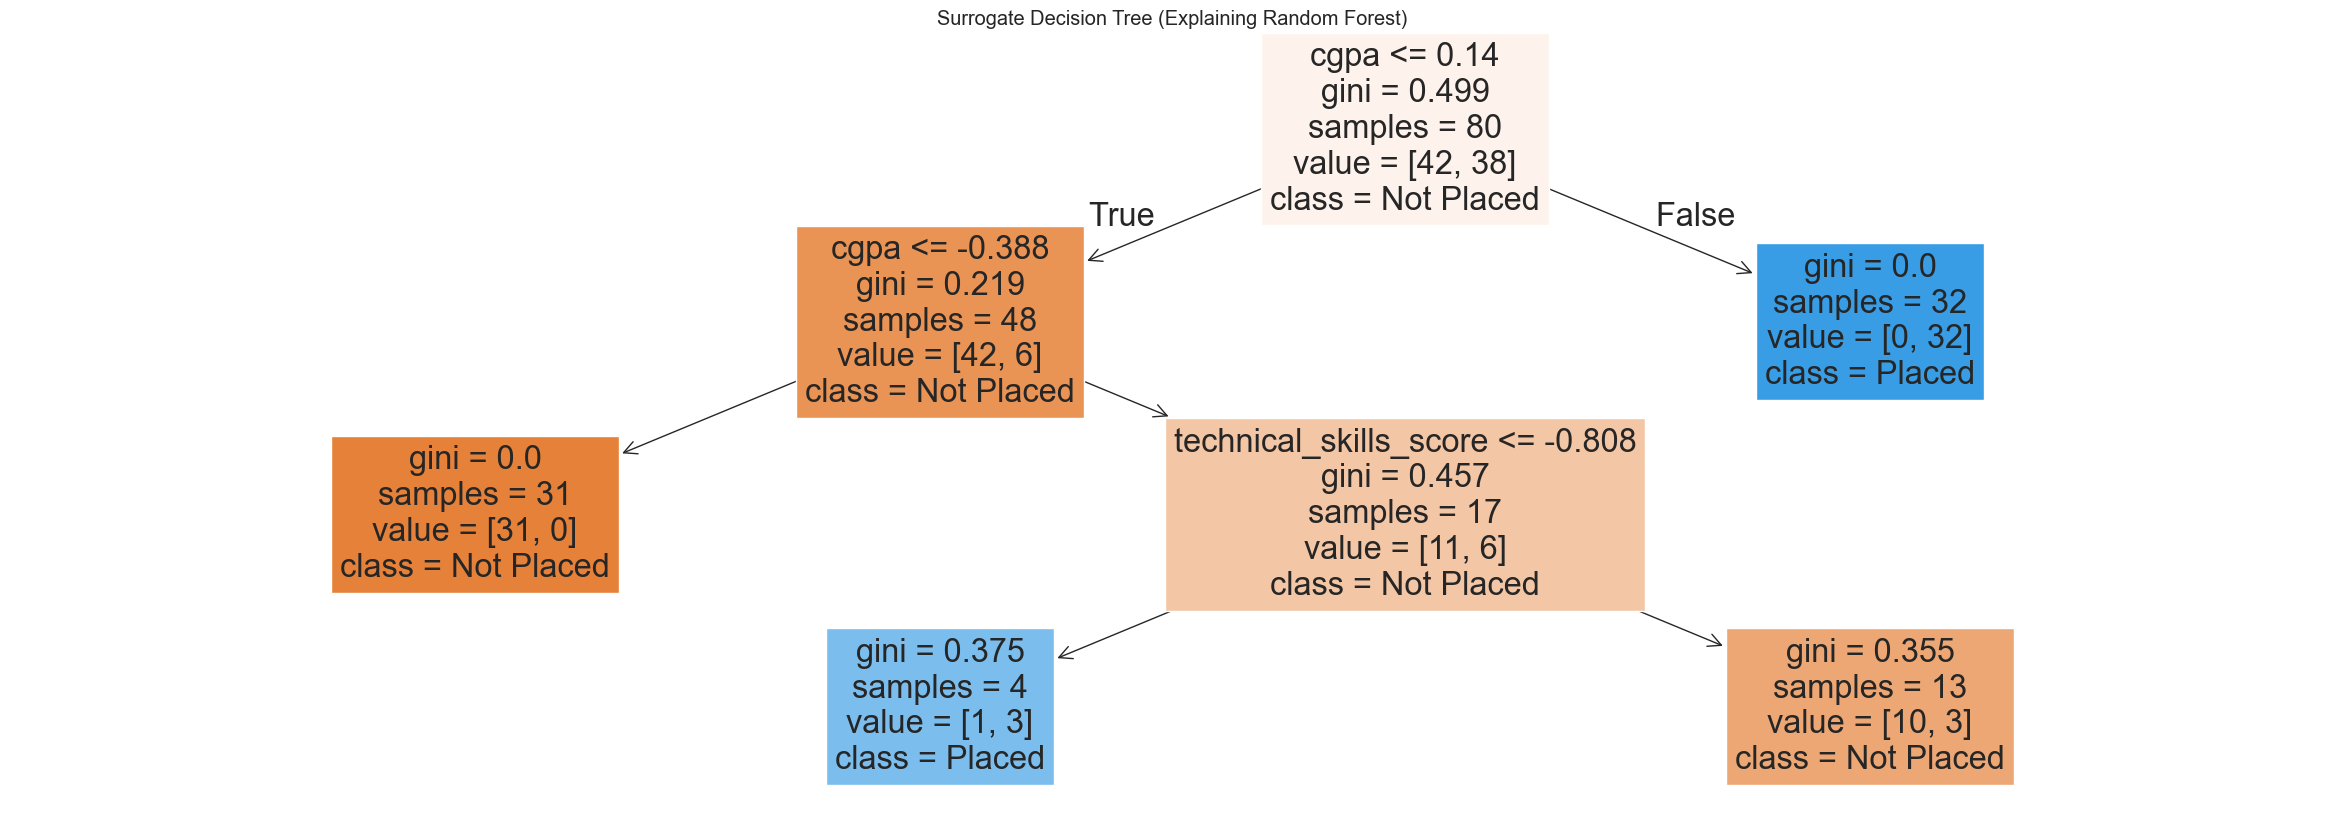

In [209]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(30,10))  # You can adjust the size
plot_tree(
    surrogate, 
    feature_names=feature_names, 
    class_names=["Not Placed", "Placed"], 
    filled=True,
    # rounded=True
)
plt.title("Surrogate Decision Tree (Explaining Random Forest)")
plt.show()


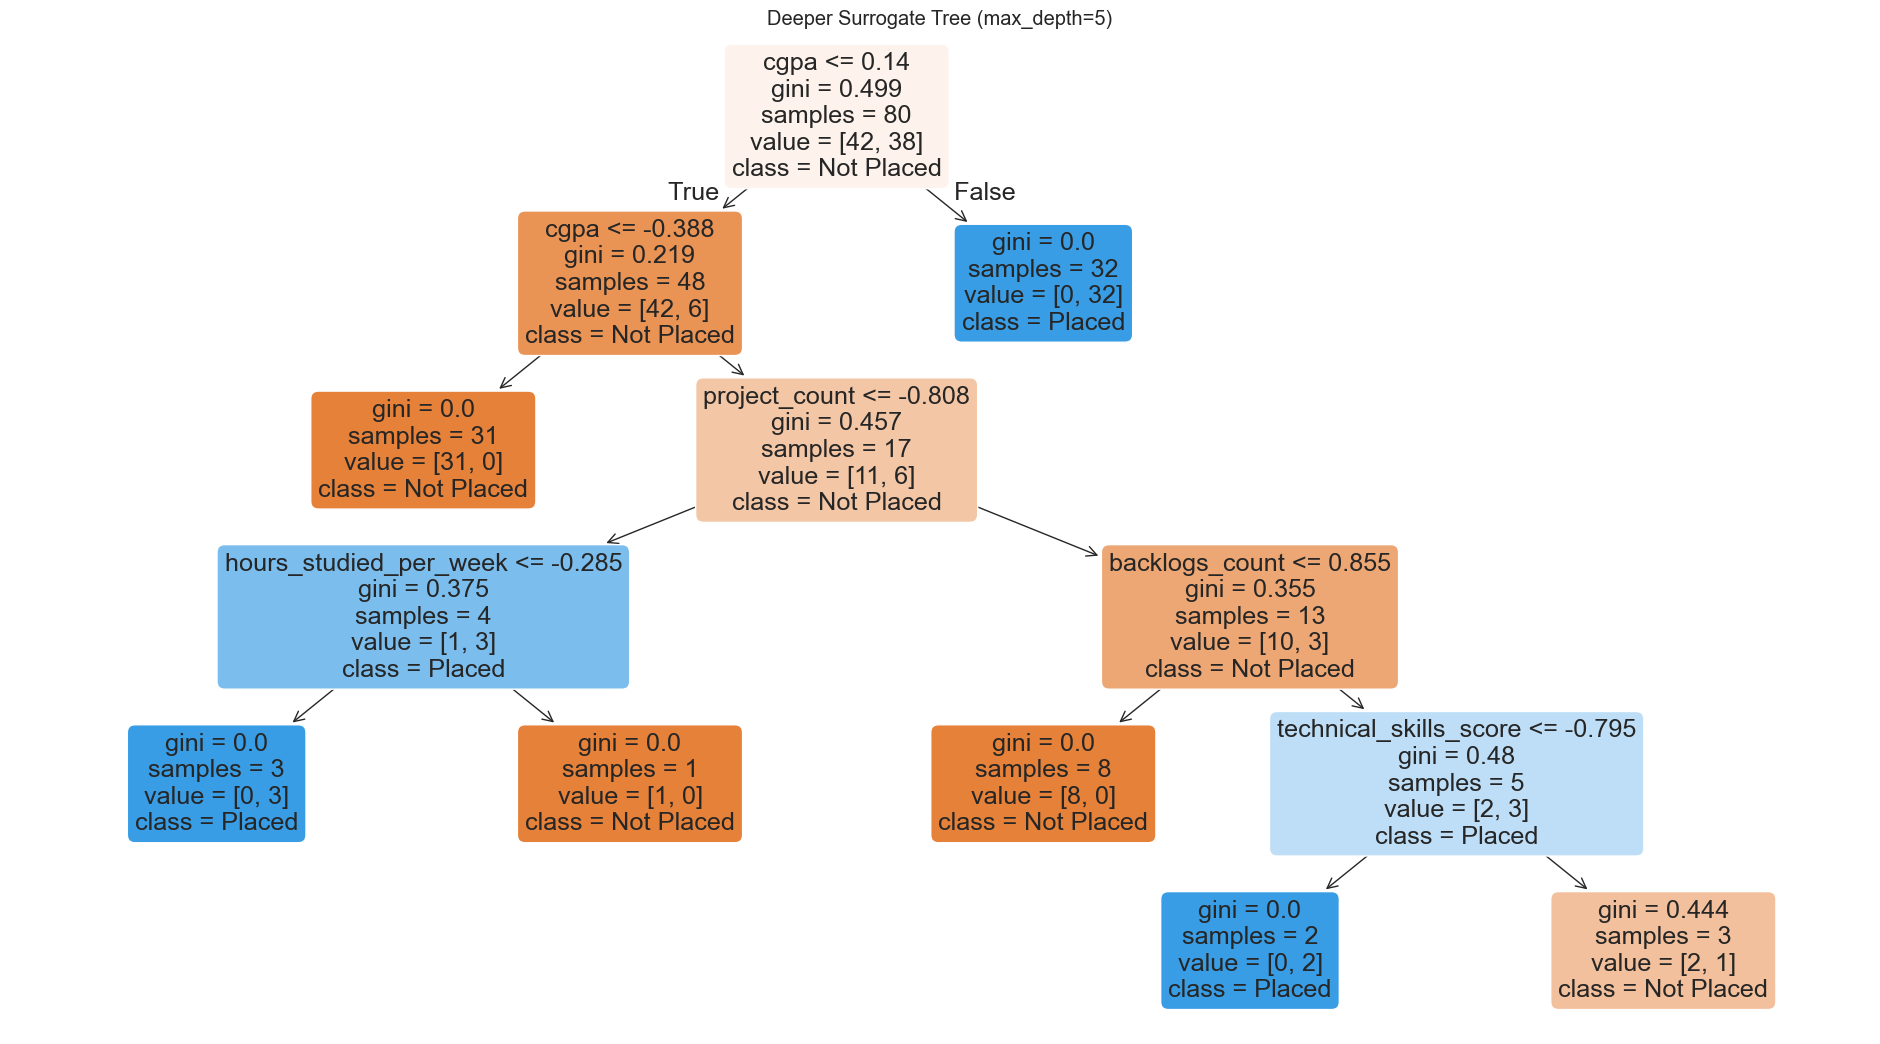

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Train a deeper surrogate tree
surrogate = DecisionTreeClassifier(max_depth=5, random_state=0)
surrogate.fit(X_train, best_model.predict(X_train))  # mimic RF predictions

# Plot the deeper tree
plt.figure(figsize=(24, 13))
tree.plot_tree(
    surrogate,
    feature_names=X.columns,
    class_names=["Not Placed", "Placed"],
    filled=True,
    rounded=True
)
plt.title("Deeper Surrogate Tree (max_depth=5)")
plt.show()


### R-SCORE reliability check

In [211]:
# 7. R-SCORE RELIABILITY (SIMULATED EXAMPLE)
# We'll test explanation consistency by checking stability of SHAP top features

top_features_runs = []

for i in range(3):  # Run SHAP multiple times to check consistency
    explainer = shap.TreeExplainer(best_model)
    shap_vals = explainer.shap_values(X_test)
    top = np.argsort(np.abs(shap_vals[1]).mean(axis=0))[-5:]
    top_features_runs.append([X.columns[i] for i in top])


In [212]:
# Show results of top features per run
for i, run in enumerate(top_features_runs):
    print(f"Top features run {i+1}: {run}")

Top features run 1: ['iq', 'cgpa']
Top features run 2: ['iq', 'cgpa']
Top features run 3: ['iq', 'cgpa']


In [213]:
import joblib

# Save the best model (Random Forest)
joblib.dump(models["Random Forest"], "random_forest_model.pkl")

print("Model saved as random_forest_model.pkl")

Model saved as random_forest_model.pkl
